In [60]:
# Импорт необходимых библиотек
import numpy as np
import spectral as spy
import matplotlib.pyplot as plt
from numba import jit


In [61]:
hsi_data = spy.envi.open('data/jasperRidge2_F224.hdr',
                         'data/jasperRidge2_F224.img')

In [62]:
# Вывод метаданных изображения
print(hsi_data.metadata)


{'description': 'File Resize Result, x resize factor: 1.000000, y resize factor: 1.000000.\n[Sat May 24 21:05:17 2014]', 'samples': '100', 'lines': '100', 'bands': '224', 'header offset': '0', 'file type': 'ENVI Standard', 'data type': '2', 'interleave': 'bil', 'sensor type': 'Unknown', 'byte order': '0', 'default bands': ['35', '20', '7'], 'wavelength units': 'Nanometers', 'reflectance scale factor': '10000.000000', 'wavelength': ['369.850006', '379.690002', '389.529999', '399.369995', '409.209991', '419.059998', '428.910004', '438.760010', '448.609985', '458.459991', '468.309998', '478.170013', '488.019989', '497.880005', '507.739990', '517.599976', '527.469971', '537.330017', '547.200012', '557.070007', '566.940002', '576.809998', '586.679993', '596.559998', '606.429993', '616.309998', '626.190002', '636.070007', '645.960022', '655.840027', '665.729980', '675.619995', '664.140015', '673.719971', '683.299988', '692.880005', '702.460022', '712.039978', '721.630005', '731.210022', '740

In [63]:
# Функция для преобразования ГСИ в RGB
def HSI_to_RGB(hsi_data, red_channel, green_channel, blue_channel):
    rgb_image = np.zeros((hsi_data.shape[0], hsi_data.shape[1], 3))
    rgb_image[..., 0] = hsi_data[:, :, red_channel].squeeze()  # Красный
    rgb_image[..., 1] = hsi_data[:, :, green_channel].squeeze()  # Зеленый
    rgb_image[..., 2] = hsi_data[:, :, blue_channel].squeeze()  # Синий
    return rgb_image



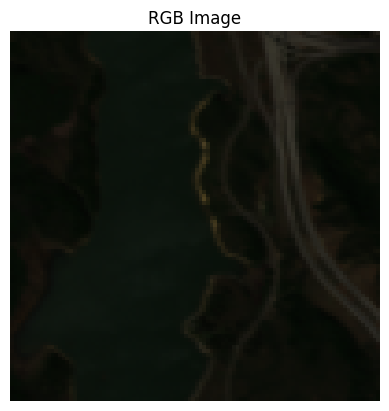

In [64]:
# Визуализация RGB изображения
rgb_image = HSI_to_RGB(hsi_data, 30, 20, 10)  # Укажите номера каналов
plt.imshow(rgb_image)
plt.title('RGB Image')
plt.axis('off')
plt.show()


In [65]:
# Функция для расчета NDVI
def calculate_ndvi(hsi_data, n_red, n_nir):
    red = hsi_data[:, :, n_red]
    nir = hsi_data[:, :, n_nir]
    ndvi = (nir - red) / (nir + red)
    return ndvi


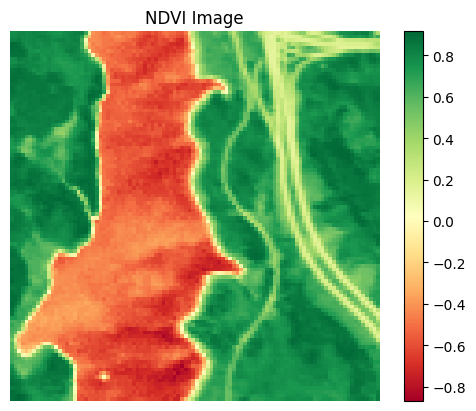

In [66]:
# Визуализация NDVI
ndvi_image = calculate_ndvi(hsi_data, 10, 54)  # Укажите номера каналов
plt.imshow(ndvi_image, cmap='RdYlGn')
plt.title('NDVI Image')
plt.colorbar()
plt.axis('off')
plt.show()


In [67]:
# Реализация алгоритма k-means
def do_kmeans(X, K, max_iters=100):
    from sklearn.cluster import KMeans
    kmeans = KMeans(n_clusters=K, max_iter=max_iters)
    kmeans.fit(X)
    return kmeans.cluster_centers_, kmeans.labels_


In [68]:
# Применение k-means к ГСИ
hsi_data_array = hsi_data.load()  # Загрузка данных в виде NumPy массива
hsi_reshaped = hsi_data_array.reshape(-1, hsi_data_array.shape[2])  # Преобразование в вектор признаков
centroids, labels = do_kmeans(hsi_reshaped, K=12)  # Укажите количество кластеров


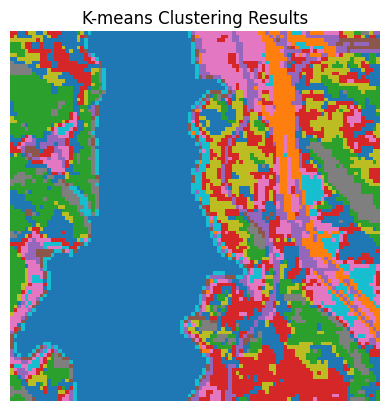

In [69]:
# Визуализация результатов кластеризации
labels_reshaped = labels.reshape(hsi_data.shape[0], hsi_data.shape[1])
plt.imshow(labels_reshaped, cmap='tab10')
plt.title('K-means Clustering Results')
plt.axis('off')
plt.show()
